### Import Required Libraries

In [3]:
# Libraries to process file and visualization for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# Library version
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
# print("Matplotlib Version: ", matplotlib.__version__)

Numpy Version:  2.3.0
Pandas Version:  2.3.0


### Import Dataset

In [5]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv("Gujarat_Rainfall.csv")
dataset_original = dataset.copy()

### Summary of Dataset
This dataset is a comprehensive collection of historical weather data for `Gujarat` state in India. It includes information on the amount of rainfall recorded each day from the `8th DEC 2015` to the `10th FEB 2025`, allowing for a detailed analysis of precipitation patterns across different districts in Gujarat. This dataset contains 15 columns such as date of record, month, season, station name (exact location), state, district, average temperature, minimum temperature, maximum temperature, wind speed, air pressure, elevation, latitude, longitude, rainfall in mm.

In [6]:
# check total number of rows and columns
dataset.shape

(61988, 15)

In [7]:
# Check first five rows 
dataset.head()

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
0,2015-12-08,December,Winter,Deesa,GJ,Banaskantha,26.4,14.6,32.7,NaN,NaN,135,24.2,72.2,NaN
1,2015-12-09,December,Winter,Deesa,GJ,Banaskantha,25.6,15.6,30.0,NaN,NaN,135,24.2,72.2,NaN
2,2015-12-10,December,Winter,Deesa,GJ,Banaskantha,25.2,16.6,30.0,NaN,NaN,135,24.2,72.2,NaN
3,2015-12-11,December,Winter,Deesa,GJ,Banaskantha,21.5,13.4,25.6,NaN,NaN,135,24.2,72.2,NaN
4,2015-12-12,December,Winter,Deesa,GJ,Banaskantha,20.8,10.2,26.2,NaN,NaN,135,24.2,72.2,NaN


### Columns Description
- `date_of_record` - The specific date on which the weather observations were recorded (in `YYYY-MM-DD` format).

- `month` - The month extracted from the date, useful for monthly trend analysis.

- `season` - The meteorological season corresponding to the date — typically `Winter (Dec–Feb)`, `Pre-Monsoon (Mar–May)`, `Monsoon (Jun–Sep)`, or `Post-Monsoon (Oct–Nov)` for India.

- `station_name` - The name of the weather station where the data was collected. Each station corresponds to a specific geographical location.

- `state` - The Indian state or union territory where the weather station is located.

- `district` - The district (administrative division) within the state where the weather station operates.

- `avg_temp` - The average daily temperature recorded at the station, measured in degrees Celsius (°C).

- `min_temp` - The minimum temperature observed during the day (°C).

- `max_temp` - The maximum temperature observed during the day (°C).  

- `wind_speed` - The wind speed recorded at the station, measured in kilometers per hour (km/h).

- `air_pressure` - The atmospheric pressure measured at the station, measured in hectopascals (hPa) or millibars (mb).

- `elevation` - The height above sea level of the weather station, measured in meters (m) — affects temperature and pressure readings.

- `latitude` - The geographical latitude (in decimal degrees) of the station, indicating its north–south position on the Earth.

- `longitude` - The geographical longitude (in decimal degrees) of the station, indicating its east–west position on the Earth.

- `rainfall` - The total rainfall measured during the day, measured in millimeters (mm).

In [8]:
# check all available columns
dataset.columns

Index(['date_of_record', 'month', 'season', 'station_name', 'state',
       'district', 'avg_temp', 'min_temp', 'max_temp', 'wind_speed',
       'air_pressure', 'elevation', 'latitude', 'longitude', 'rainfall'],
      dtype='object')

In [9]:
# Check last five rows
dataset.tail()

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
61983,2025-02-06,February,Winter,Surat / Magdala,GJ,Surat,24.3,17.0,31.0,20.2,1012.3,5,21.1141,72.7418,0.0
61984,2025-02-07,February,Winter,Surat / Magdala,GJ,Surat,25.5,19.0,33.0,14.4,1012.6,5,21.1141,72.7418,0.0
61985,2025-02-08,February,Winter,Surat / Magdala,GJ,Surat,25.3,17.0,33.0,9.8,1012.3,5,21.1141,72.7418,0.0
61986,2025-02-09,February,Winter,Surat / Magdala,GJ,Surat,25.3,17.0,34.0,8.3,1011.8,5,21.1141,72.7418,0.0
61987,2025-02-10,February,Winter,Surat / Magdala,GJ,Surat,24.6,17.0,30.7,14.0,1013.0,5,21.1141,72.7418,0.0


In [10]:
# Check random five rows
dataset.sample(5)

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
15283,2021-11-03,November,Post-monsoon,Ahmadabad,GJ,Ahmedabad,25.0,18.0,34.0,5.4,1012.6,55,23.0667,72.6333,0.0
45463,2017-08-27,August,Monsoon,Bhaunagar,GJ,Bhavnagar,27.8,24.6,29.8,NaN,NaN,5,21.7500,72.2000,63.0
35112,2022-02-22,February,Winter,Baroda / Vadodara,GJ,Vadodara,25.0,18.0,34.0,7.6,1010.2,34,22.3000,73.2500,0.0
10808,2023-09-26,September,Monsoon,Kandla Aerodrome,GJ,Kachchh,27.7,24.0,34.0,9.6,1007.5,29,23.1500,70.1167,0.0
9038,2022-12-27,December,Winter,Bhuj-Rudramata,GJ,Kachchh,17.8,9.9,27.4,8.3,1017.3,78,23.2500,69.6667,0.0


In [11]:
# check all columns datatypes also observe non-null values.
dataset.info()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There are total 61988 records available, range from 0 to 61987.
# 2) All columns except "date_of_record" are in correct datatype. convert "date_of_record" in datetime datatype. 
# 3) The "state" column we can remove. because, this dataset only for Gujarat state.
# 4) There are missing values in min_temp, max_temp, wind_speed, air_pressure, rainfall.
# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61988 entries, 0 to 61987
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_of_record  61988 non-null  object 
 1   month           61988 non-null  object 
 2   season          61988 non-null  object 
 3   station_name    61988 non-null  object 
 4   state           61988 non-null  object 
 5   district        61988 non-null  object 
 6   avg_temp        61988 non-null  float64
 7   min_temp        60131 non-null  float64
 8   max_temp        50259 non-null  float64
 9   wind_speed      39895 non-null  float64
 10  air_pressure    39474 non-null  float64
 11  elevation       61988 non-null  int64  
 12  latitude        61988 non-null  float64
 13  longitude       61988 non-null  float64
 14  rainfall        40122 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 7.1+ MB


### Checking Missing Values

In [12]:
# Get total missing values and it's percentages

total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

# -------------------------------------------------------------------------------------------
# Observation :
# 1) Here, we have missing values in dataset. columns 'min_temp' and 'max_temp' have 3% and 18.92% missing values resp.
# 2) columns 'wind_speed', 'air_pressure' and 'rainfall' have 35.64% , 36.32% , 35.27% missing values resp.
# 3) Columns with missing values 25% or greater need to drop respective column.
# 4) In imputation if variable is char then we will use mode function and if it is numeric then we will first check for outrliers if there are outrliers then we will impute by median else we will impute using mean.
# -------------------------------------------------------------------------------------------

,Total_Missing,%_Missing
date_of_record,0.0,0.00
month,0.0,0.00
season,0.0,0.00
station_name,0.0,0.00
state,0.0,0.00
district,0.0,0.00
avg_temp,0.0,0.00
min_temp,1857.0,3.00
max_temp,11729.0,18.92
wind_speed,22093.0,35.64


In [13]:
dataset[dataset["wind_speed"].isnull()]

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
0,2015-12-08,December,Winter,Deesa,GJ,Banaskantha,26.4,14.6,32.7,NaN,NaN,135,24.2000,72.2000,NaN
1,2015-12-09,December,Winter,Deesa,GJ,Banaskantha,25.6,15.6,30.0,NaN,NaN,135,24.2000,72.2000,NaN
2,2015-12-10,December,Winter,Deesa,GJ,Banaskantha,25.2,16.6,30.0,NaN,NaN,135,24.2000,72.2000,NaN
3,2015-12-11,December,Winter,Deesa,GJ,Banaskantha,21.5,13.4,25.6,NaN,NaN,135,24.2000,72.2000,NaN
4,2015-12-12,December,Winter,Deesa,GJ,Banaskantha,20.8,10.2,26.2,NaN,NaN,135,24.2000,72.2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61826,2024-08-30,August,Monsoon,Surat / Magdala,GJ,Surat,28.9,26.6,NaN,NaN,NaN,5,21.1141,72.7418,5.1
61827,2024-08-31,August,Monsoon,Surat / Magdala,GJ,Surat,29.1,26.5,NaN,NaN,NaN,5,21.1141,72.7418,0.3
61828,2024-09-01,September,Monsoon,Surat / Magdala,GJ,Surat,29.5,26.4,NaN,NaN,NaN,5,21.1141,72.7418,0.0
61829,2024-09-03,September,Monsoon,Surat / Magdala,GJ,Surat,26.8,24.8,NaN,NaN,NaN,5,21.1141,72.7418,39.1


### Check Statistical Measure for Numerical Columns

In [14]:
# Mean and Median(50%) difference is more than 10% then there are possible outliers present in data.
dataset.describe(include="number").T

# -------------------------------------------------------------------------------------------
# Observation :
# 1) In 'elevation' column, mean and median difference is more than 10% then there are possible outliers present in column.
# -------------------------------------------------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
avg_temp,61988.0,27.370825,4.000929,12.2000,24.9000,28.0000,29.9000,40.9000
min_temp,60131.0,22.313973,5.049992,1.4000,18.6000,24.0000,26.2000,31.8000
max_temp,50259.0,32.846710,4.183345,18.6000,30.0000,32.5000,35.2000,50.3000
wind_speed,39895.0,13.069522,6.229127,0.0000,8.7000,11.9000,16.1000,65.4000
air_pressure,39474.0,1008.846887,5.191823,988.8000,1004.9000,1009.1000,1013.2000,1022.6000
elevation,61988.0,32.506227,41.338043,0.0000,5.0000,10.0000,50.0000,135.0000
latitude,61988.0,22.247595,0.937981,20.6167,21.3167,22.3667,23.0667,24.2000
longitude,61988.0,71.169081,1.480146,68.8500,69.6667,70.9167,72.7167,73.2667
rainfall,40122.0,3.747032,14.931792,0.0000,0.0000,0.0000,0.7000,485.9000


In [15]:
temp_df = dataset.describe().T

temp_df["mean_median_diff"] = (np.abs(temp_df["mean"] - temp_df["50%"]) * 100) / (temp_df["50%"])

temp_df[(temp_df["mean_median_diff"] != float("inf")) & (temp_df["mean_median_diff"] > 10)]

,count,mean,std,min,25%,50%,75%,max,mean_median_diff
elevation,61988.0,32.506227,41.338043,0.0,5.0,10.0,50.0,135.0,225.06227


In [16]:
dataset.describe(include="O").T

,count,unique,top,freq
date_of_record,61988,3694,2025-02-10,25
month,61988,12,January,5898
season,61988,4,Winter,21312
station_name,61988,25,Bhuj-Rudramata,3691
state,61988,1,GJ,61988
district,61988,17,Kachchh,10014


### Check Duplicate Records

In [17]:
dataset.duplicated().sum()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There is no duplicated entries in dataset.
# -------------------------------------------------------------------------------------------

np.int64(0)

### Types of Columns
- Numerical - avg_temp, min_temp, max_temp, wind_speed, air_pressure, elevation, latitude, longitude, rainfall.
- Categorical - month, season, station_name, state, district.
- Datatime - date_of_record.

In [18]:
dataset["date_of_record"] = pd.to_datetime(dataset["date_of_record"])

In [19]:
numeric_cols = dataset.select_dtypes(include="number").columns
categorical_cols = dataset.select_dtypes(include=["object","category"]).columns
datetime_cols = dataset.select_dtypes(include="datetime").columns

### Univariate Analysis

In [20]:
def numerical_univariate(dataset, column):
    """
    Plot histogram + KDE and boxplot for a numeric column,
    and print descriptive statistics including skewness.
    """
    print("-"*150)
    print(f"Feature Name: {column}", end="\n\n")
    
    # 1. Print descriptive stats
    print("Descriptive Statistics:")
    print(dataset[column].describe())
    print(f"\nSkewness: {dataset[column].skew()}")

    # 2. Create plots
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Histogram + KDE
    sns.histplot(dataset[column], kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {column}")
    ax[0].set_xlabel("")  

    # Boxplot
    sns.boxplot(x=dataset[column], ax=ax[1], orient="h")

    # Layout
    plt.tight_layout()
    plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: avg_temp

Descriptive Statistics:
count    61988.000000
mean        27.370825
std          4.000929
min         12.200000
25%         24.900000
50%         28.000000
75%         29.900000
max         40.900000
Name: avg_temp, dtype: float64

Skewness: -0.4087638751023951


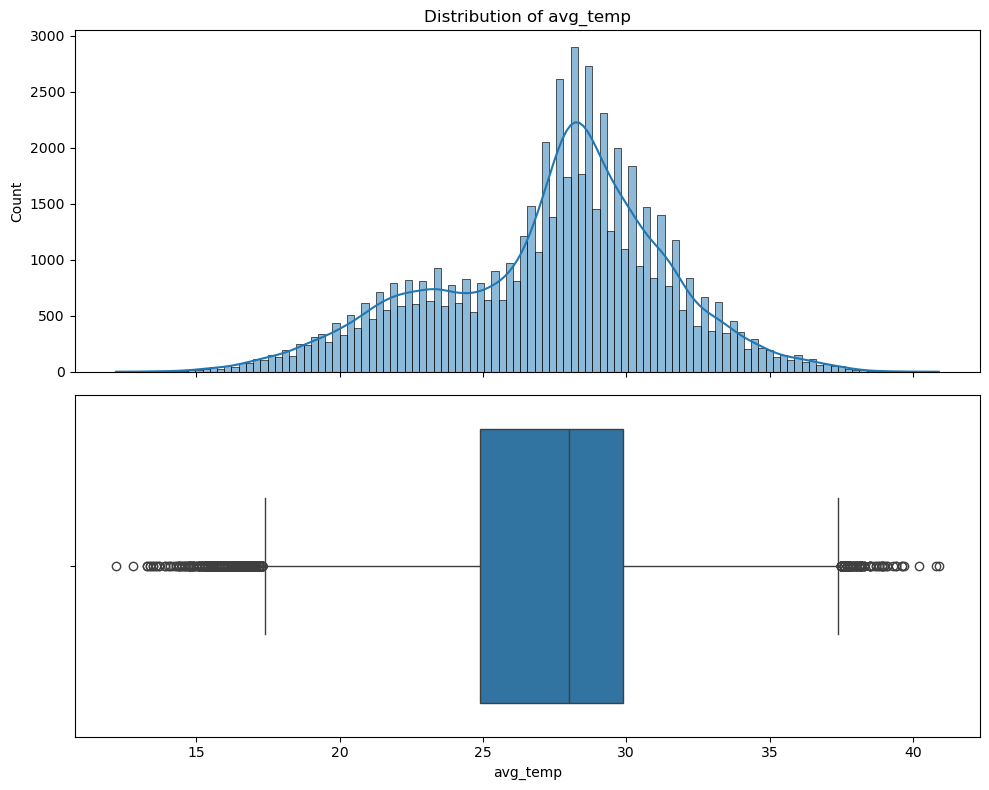

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: min_temp

Descriptive Statistics:
count    60131.000000
mean        22.313973
std          5.049992
min          1.400000
25%         18.600000
50%         24.000000
75%         26.200000
max         31.800000
Name: min_temp, dtype: float64

Skewness: -0.7490006485533648


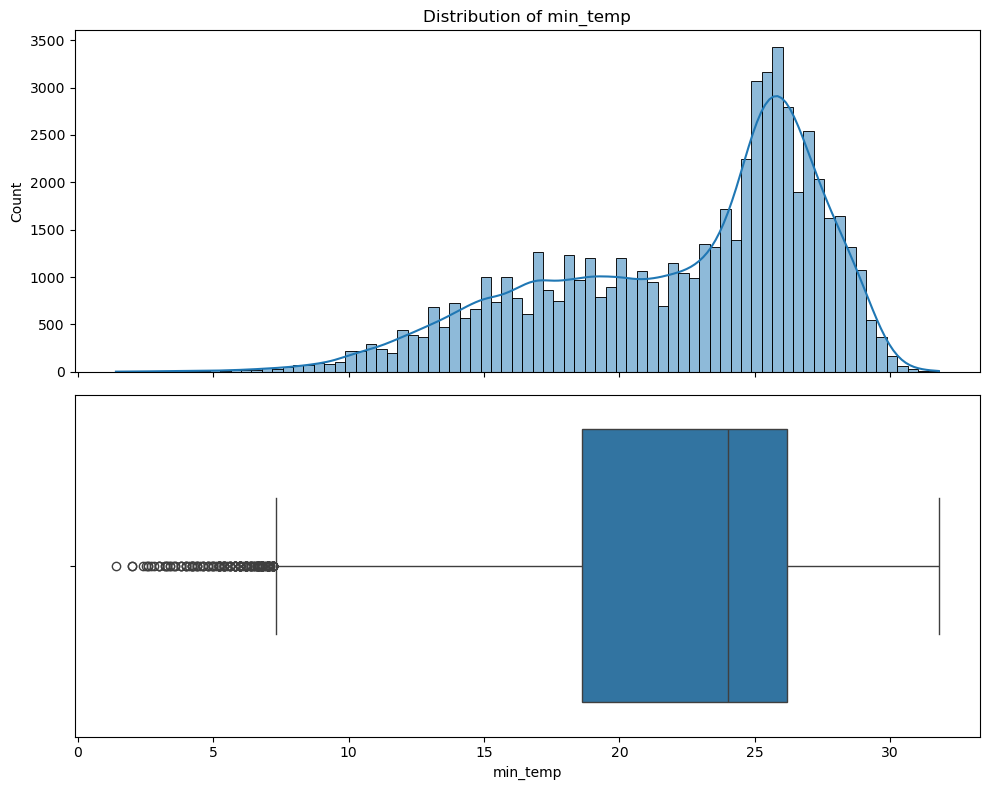

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: max_temp

Descriptive Statistics:
count    50259.000000
mean        32.846710
std          4.183345
min         18.600000
25%         30.000000
50%         32.500000
75%         35.200000
max         50.300000
Name: max_temp, dtype: float64

Skewness: 0.34522737076621923


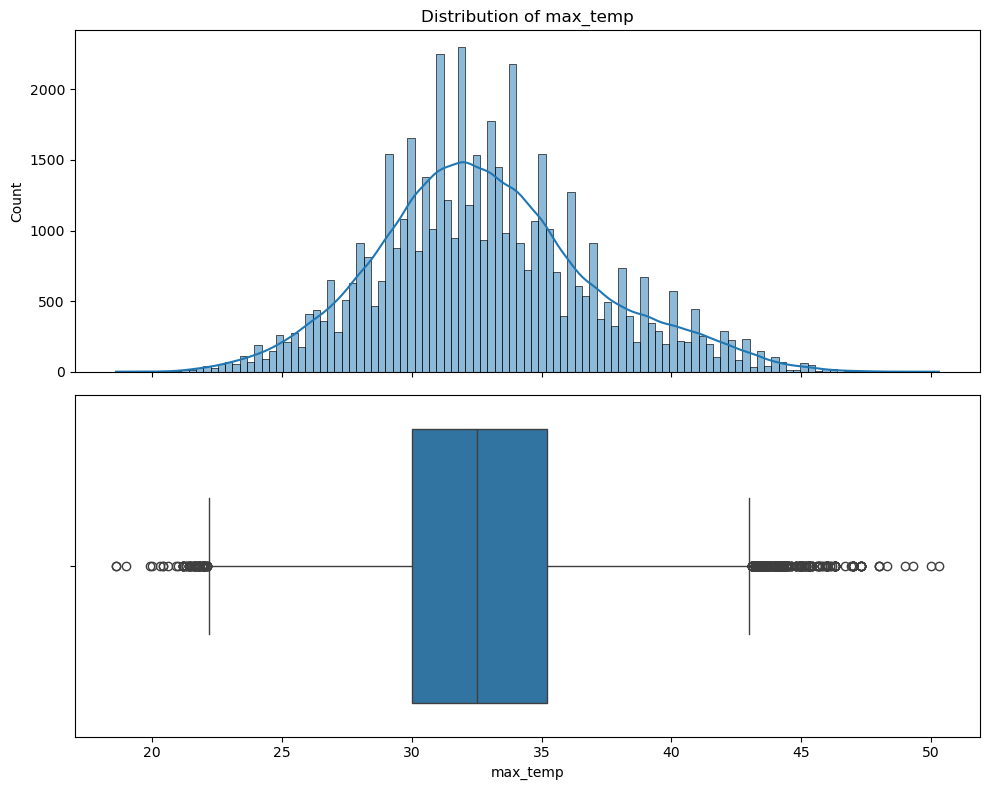

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: wind_speed

Descriptive Statistics:
count    39895.000000
mean        13.069522
std          6.229127
min          0.000000
25%          8.700000
50%         11.900000
75%         16.100000
max         65.400000
Name: wind_speed, dtype: float64

Skewness: 1.2680159514947957


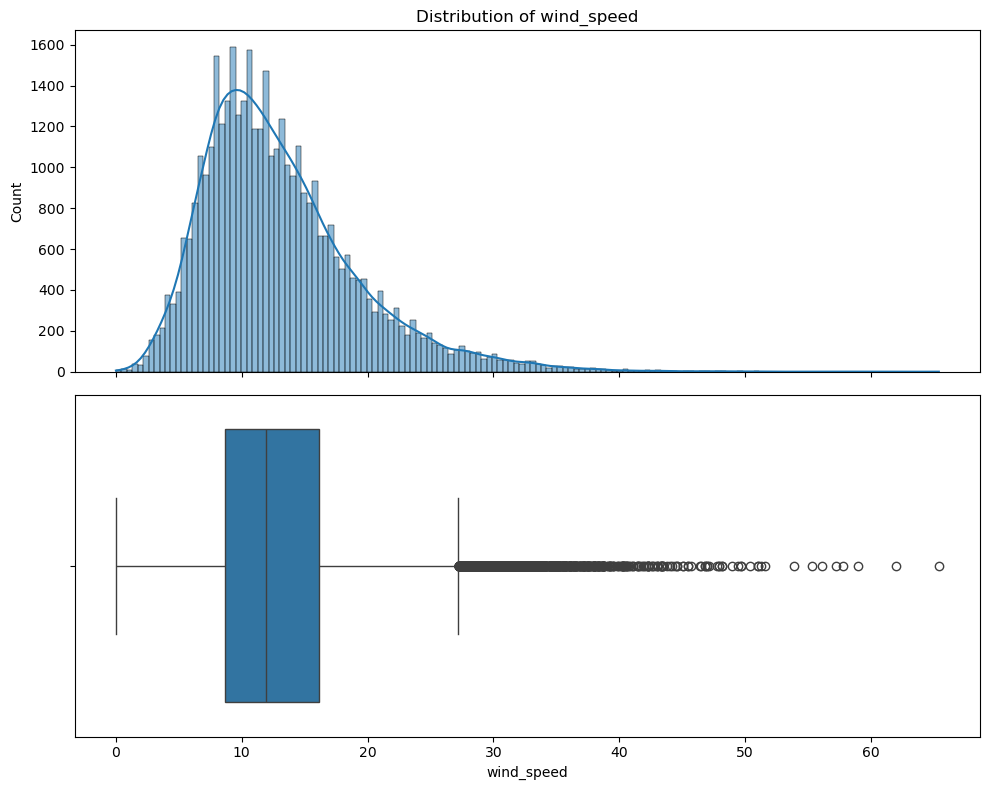

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: air_pressure

Descriptive Statistics:
count    39474.000000
mean      1008.846887
std          5.191823
min        988.800000
25%       1004.900000
50%       1009.100000
75%       1013.200000
max       1022.600000
Name: air_pressure, dtype: float64

Skewness: -0.2879130609177978


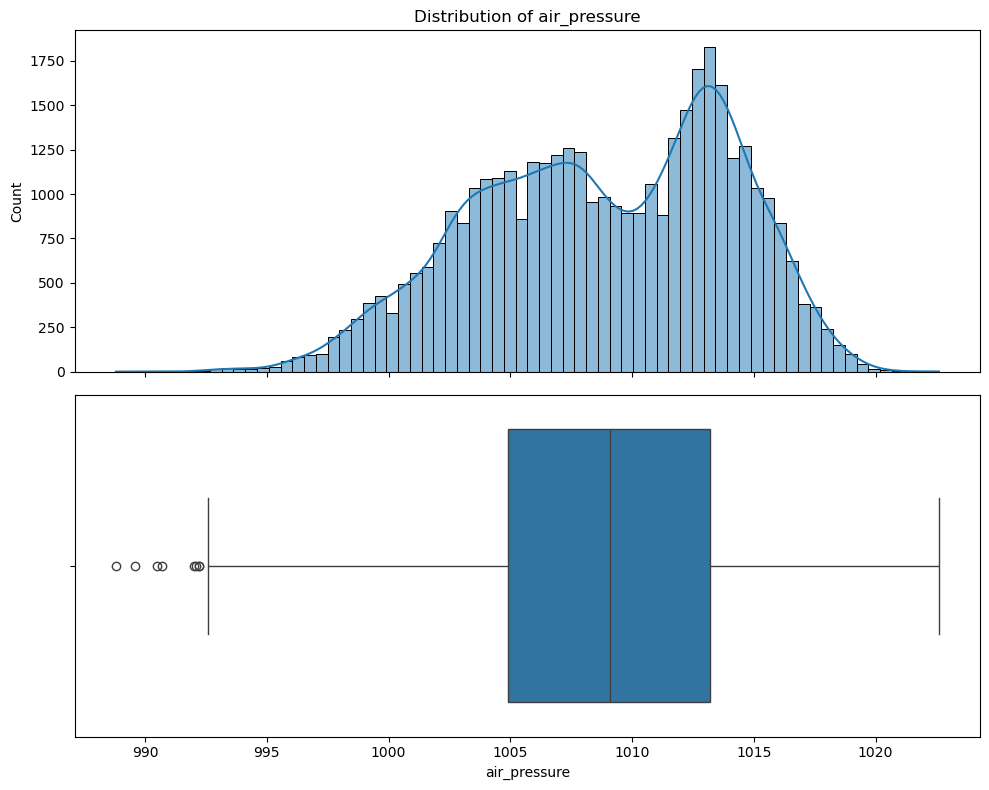

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: elevation

Descriptive Statistics:
count    61988.000000
mean        32.506227
std         41.338043
min          0.000000
25%          5.000000
50%         10.000000
75%         50.000000
max        135.000000
Name: elevation, dtype: float64

Skewness: 1.5103554990949737


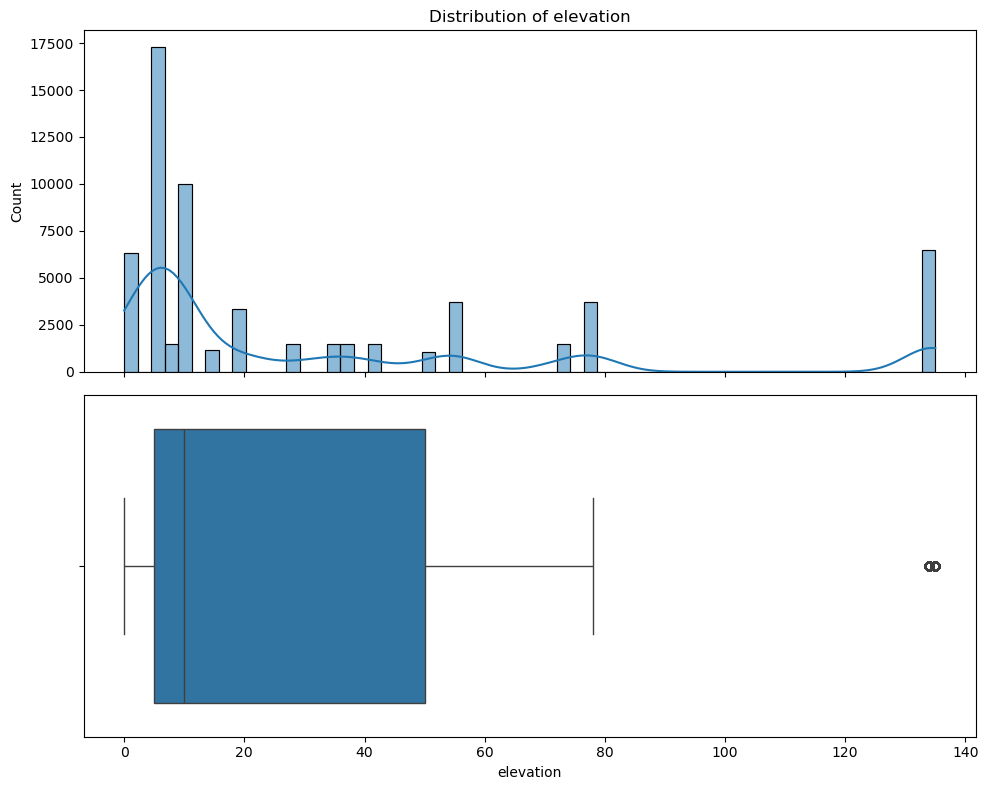

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: latitude

Descriptive Statistics:
count    61988.000000
mean        22.247595
std          0.937981
min         20.616700
25%         21.316700
50%         22.366700
75%         23.066700
max         24.200000
Name: latitude, dtype: float64

Skewness: 0.018522857150923534


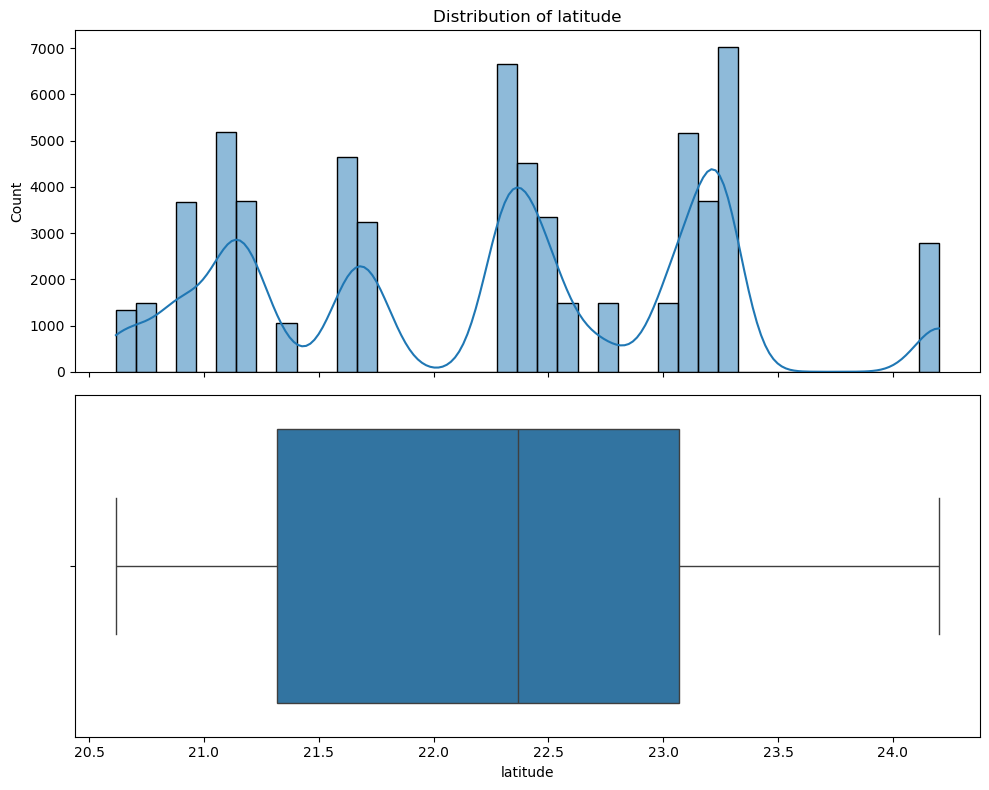

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: longitude

Descriptive Statistics:
count    61988.000000
mean        71.169081
std          1.480146
min         68.850000
25%         69.666700
50%         70.916700
75%         72.716700
max         73.266700
Name: longitude, dtype: float64

Skewness: -0.12874039654194594


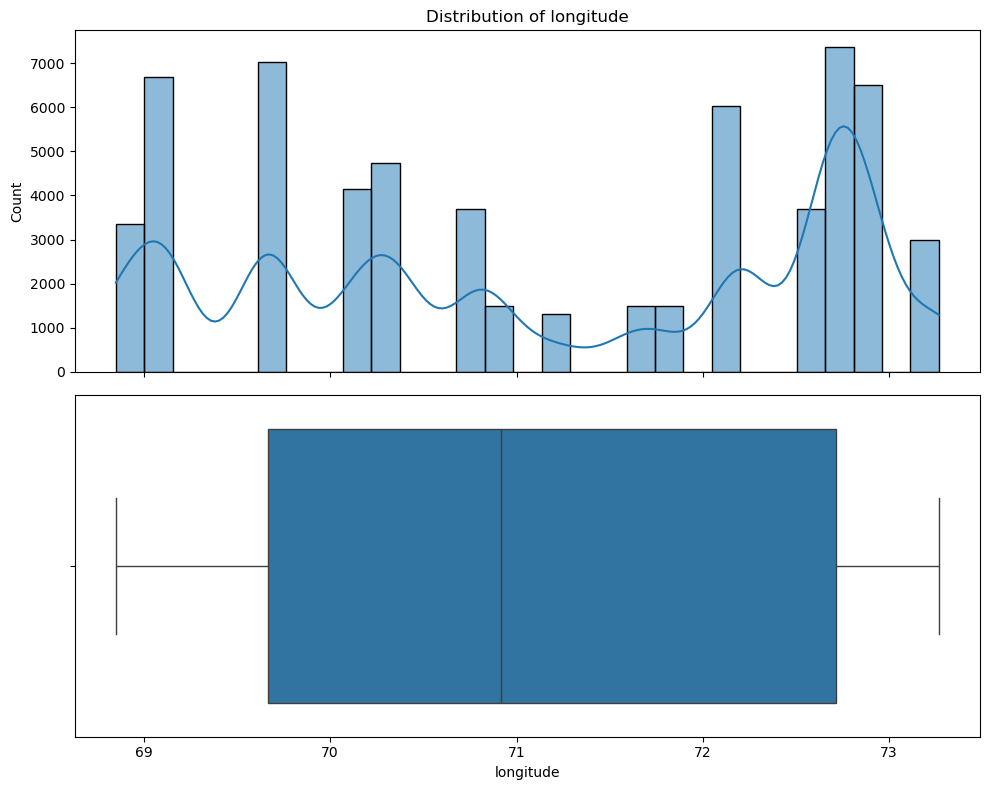

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: rainfall

Descriptive Statistics:
count    40122.000000
mean         3.747032
std         14.931792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.700000
max        485.900000
Name: rainfall, dtype: float64

Skewness: 9.258199036645395


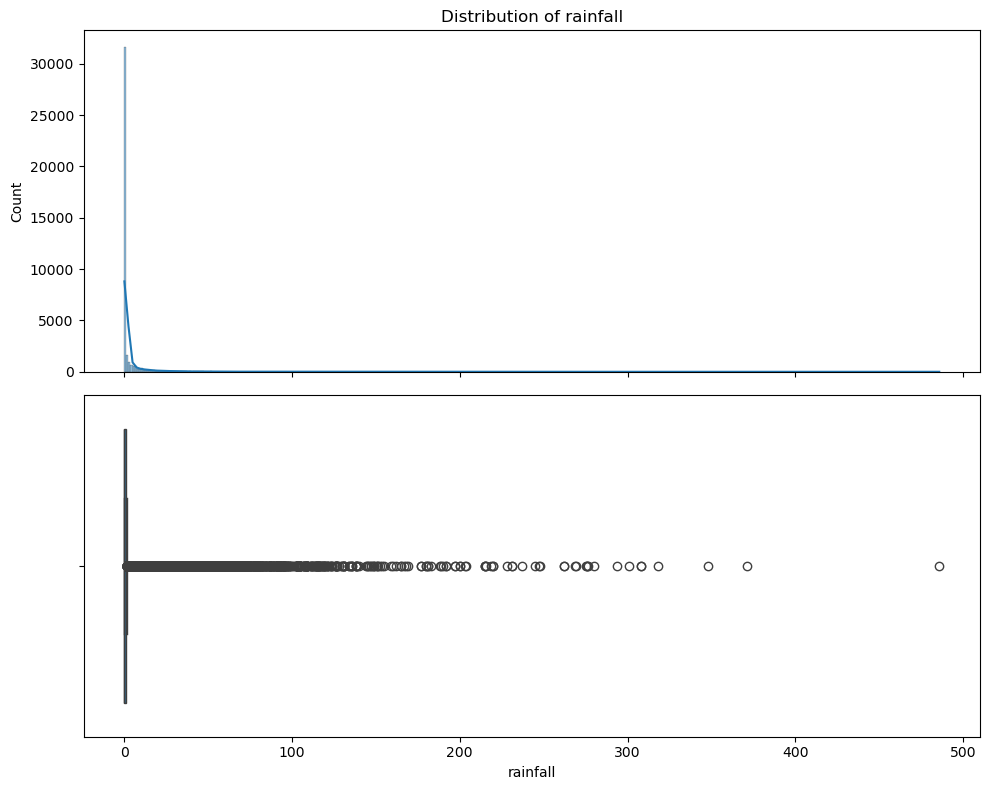

In [21]:
for col in numeric_cols:
    numerical_univariate(dataset, col)

In [22]:
categorical_cols

Index(['month', 'season', 'station_name', 'state', 'district'], dtype='object')

In [23]:
dataset["season"].value_counts()

season
Winter          21312
Monsoon         15371
Summer          15056
Post-monsoon    10249
Name: count, dtype: int64

In [24]:
def categorical_univariate(dataset, column):
    """
    Visualize and summarize a categorical feature:
    - Print frequency counts and missing values
    - Plot a countplot and a pie chart
    """
    print("-" * 150)
    print(f"Feature Name: {column}\n")

    # 1. Print descriptive stats
    print("Value Counts:")
    print(dataset[column].value_counts(dropna=False))
    print(f"\nMissing Values: {dataset[column].isnull().sum()}")

    # 2. Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Countplot (bar chart)
    sns.countplot(x=column, data=dataset, ax=ax[0], order=dataset[column].value_counts().index)
    ax[0].set_title(f"Countplot of {column}")
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis='x', rotation=45)

    # Pie chart
    dataset[column].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%', ax=ax[1], startangle=90, cmap='tab20'
    )
    ax[1].set_ylabel("")  # remove y-label
    ax[1].set_title(f"Pie Chart of {column}")

    plt.tight_layout()
    plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: month

Value Counts:
month
January      5898
December     5334
July         5228
October      5198
August       5181
May          5155
March        5138
November     5051
June         5021
September    4962
February     4942
April        4880
Name: count, dtype: int64

Missing Values: 0


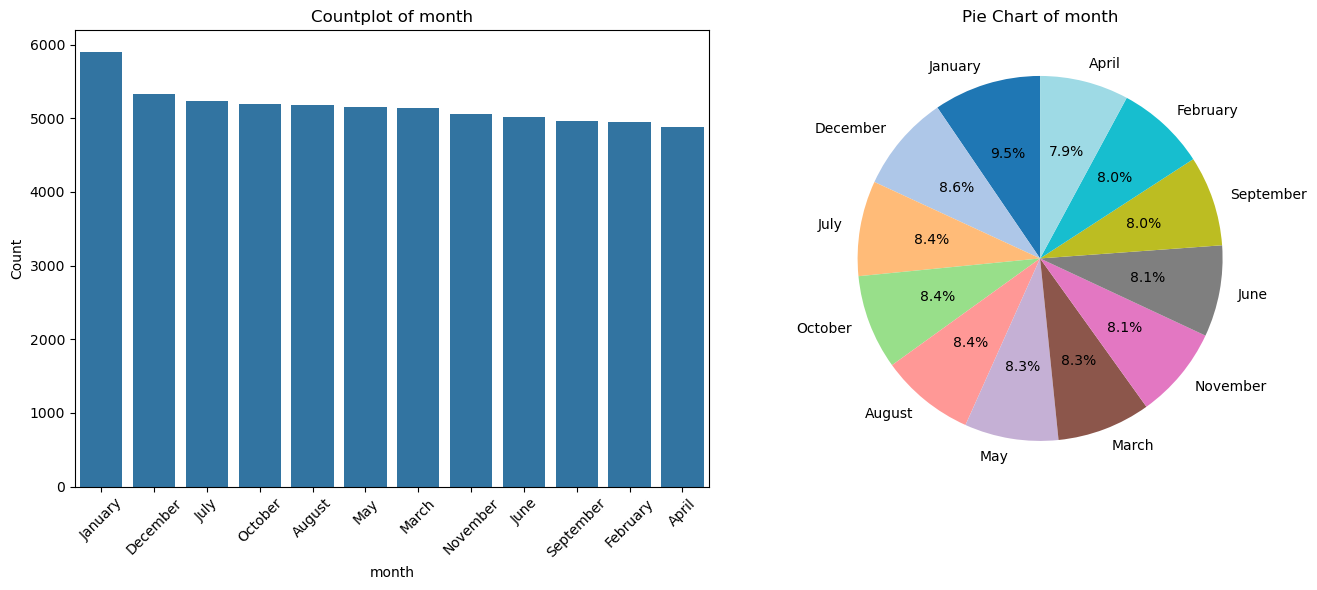

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: season

Value Counts:
season
Winter          21312
Monsoon         15371
Summer          15056
Post-monsoon    10249
Name: count, dtype: int64

Missing Values: 0


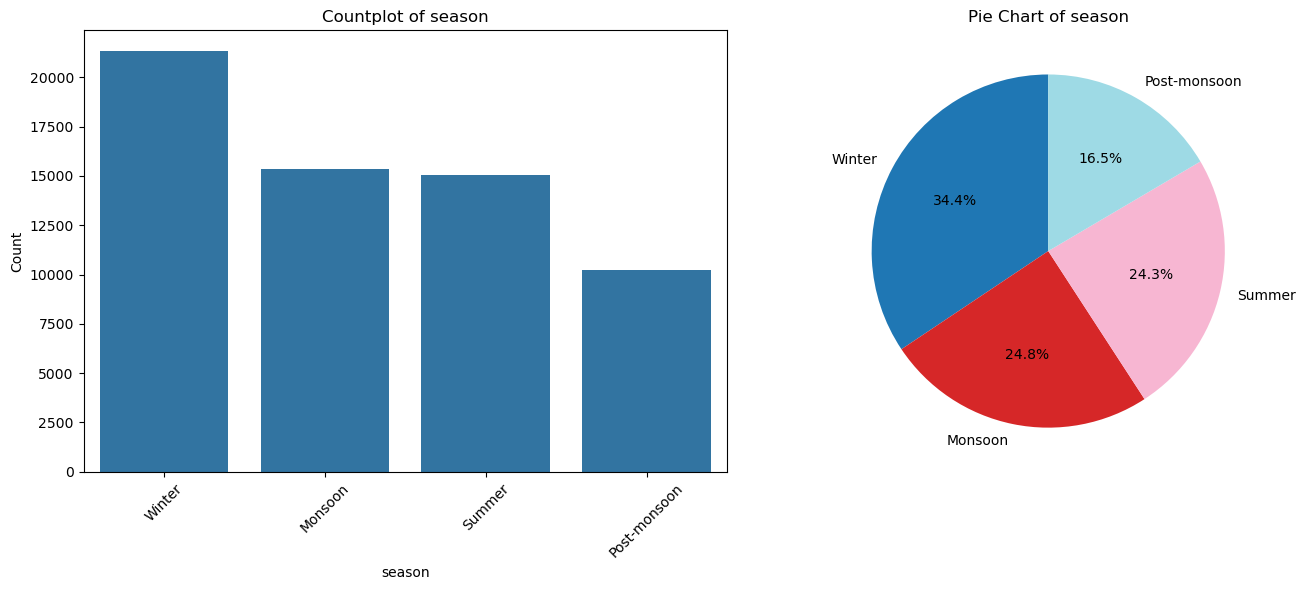

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: station_name

Value Counts:
station_name
Bhuj-Rudramata        3691
Surat                 3690
Surat / Magdala       3690
Gandhinagar           3688
Ahmadabad             3688
Rajkot                3687
Veraval               3677
Dwarka                3348
Okha                  3348
Porbandar             3346
Naliya                3345
Bhaunagar             3250
Deesa                 2777
Baroda / Vadodara     1491
Baroda Aerodrome      1491
Kandla Aerodrome      1489
New Kandla            1489
Diu                   1489
Mahuva                1489
Vallabh Vidyanagar    1489
Surendranagar         1489
Bulsar                1326
Amreli                1304
Jamnagar              1168
Keshod                1049
Name: count, dtype: int64

Missing Values: 0


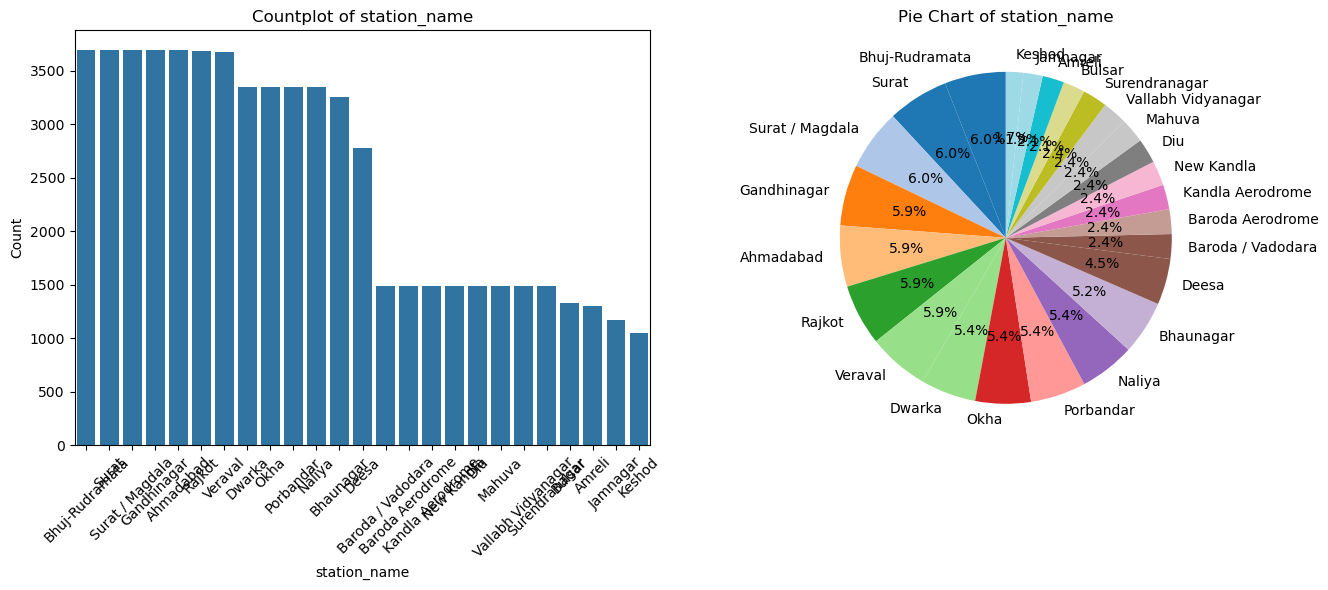

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: state

Value Counts:
state
GJ    61988
Name: count, dtype: int64

Missing Values: 0


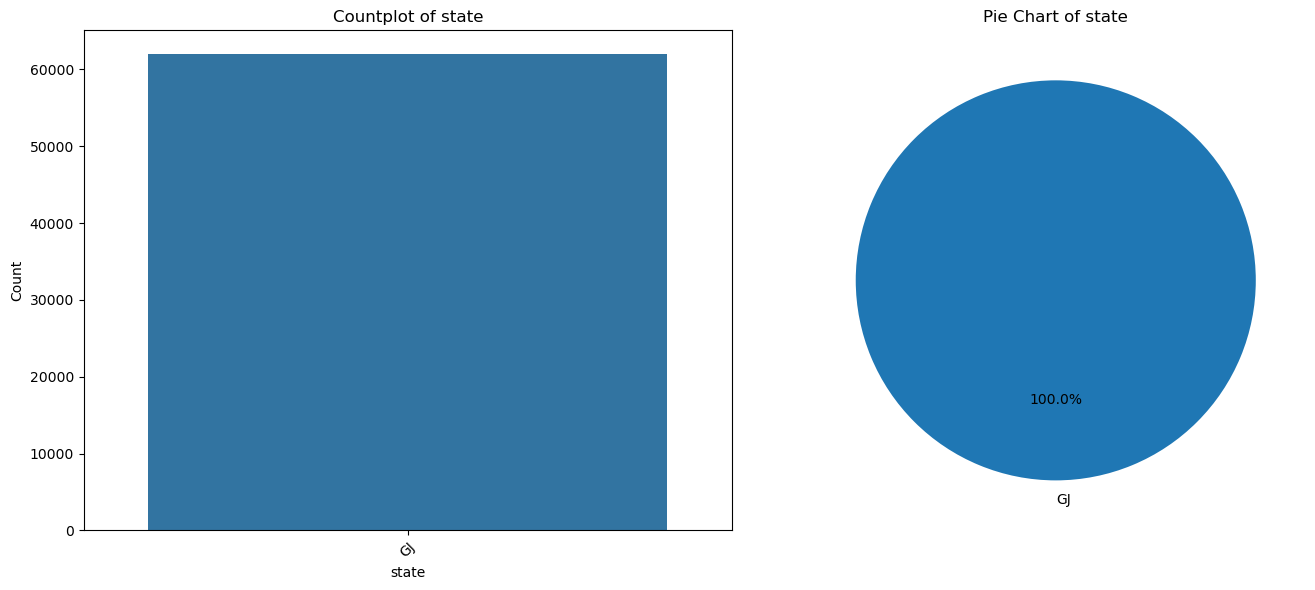

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Name: district

Value Counts:
district
Kachchh            10014
Surat               7380
Devbhumi Dwarka     6696
Bhavnagar           4739
Gir Somnath         4726
Gandhinagar         3688
Ahmedabad           3688
Rajkot              3687
Porbandar           3346
Vadodara            2982
Banaskantha         2777
Surendranagar       1489
Anand               1489
Diu                 1489
Valsad              1326
Amreli              1304
Jamnagar            1168
Name: count, dtype: int64

Missing Values: 0


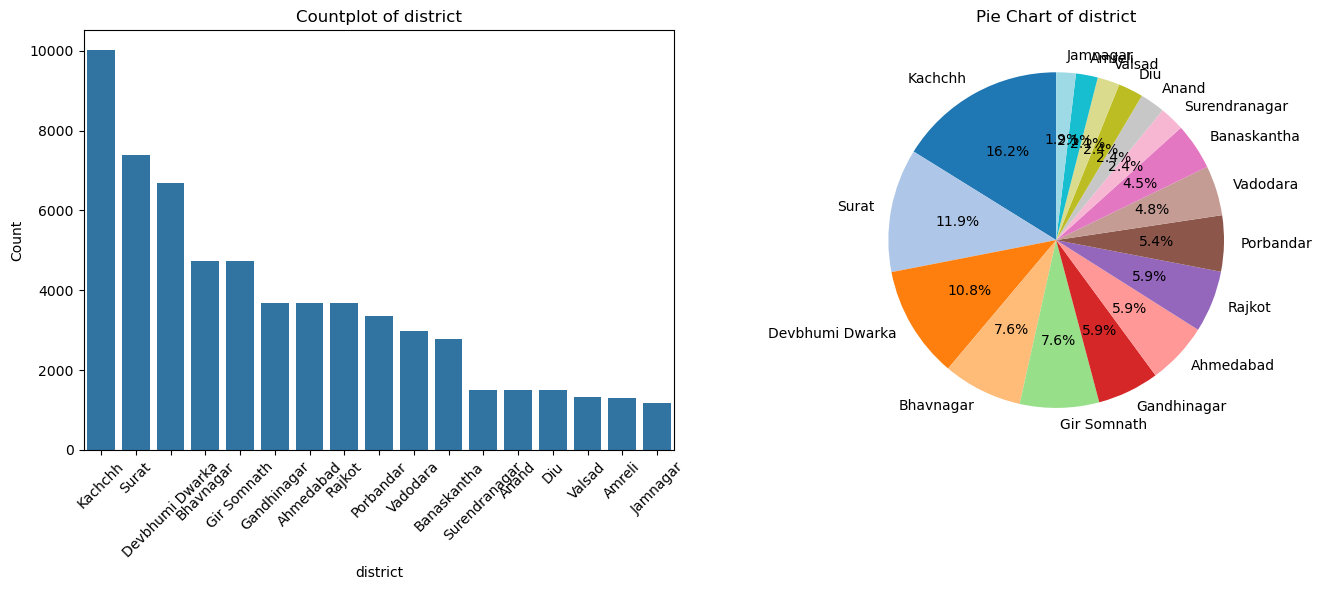

In [26]:
for col in categorical_cols:
    categorical_univariate(dataset, col)